## 1. Data Mining

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
# reading numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [22]:
# Reading categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


## 2. Data Cleaning

In [ ]:
# Drop ID column
df = df.drop(columns=['customerID'])

# Convert target to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'TotalCharges' to numeric (some are blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
print(df.isna().sum())

# Fill missing numeric with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [37]:
# Detect outliers in MonthlyCharges or TotalCharges using IQR method. Decide whether to cap, transform, or leave them.
q1 = df['MonthlyCharges'].quantile(0.25)
q3 = df['MonthlyCharges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['MonthlyCharges'] = df['MonthlyCharges'].clip(lower=lower_bound, upper=upper_bound)



In [38]:
# Check if there are any remaining outliers
print(df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)])



Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [41]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [40]:
# delete duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. Remaining rows: {df.shape[0]}")

Duplicates removed. Remaining rows: 7021


## 3. Data Exploration

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class balance
print(df['Churn'].value_counts(normalize=True))

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


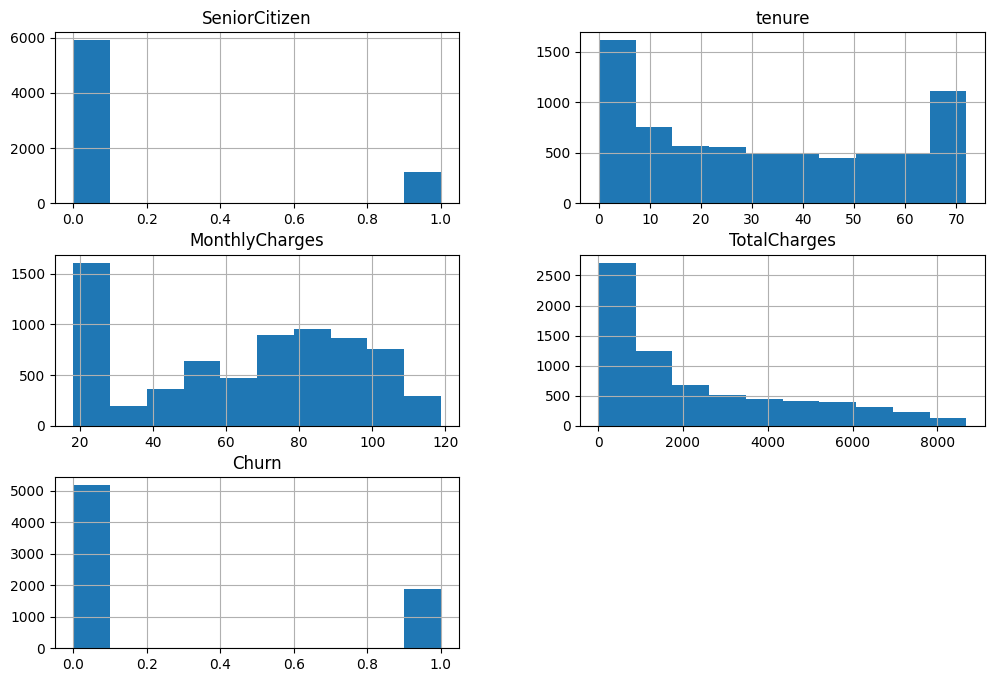

In [30]:
# Numeric distributions
df.hist(figsize=(12,8))
plt.show()

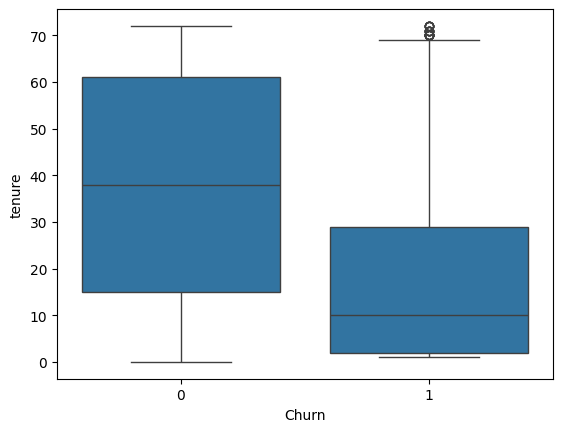

In [31]:
# Relationship between tenure and churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

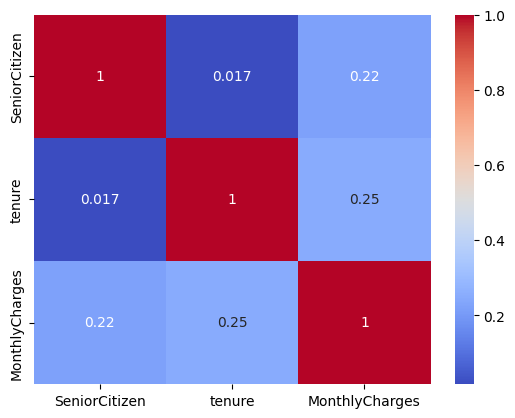

In [33]:
# Correlation heatmap (numeric only)
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

/var/folders/7c/gq0bcsjx4z5518py08krjc880000gn/T/ipykernel_14311/3447107025.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=df, ci=None)


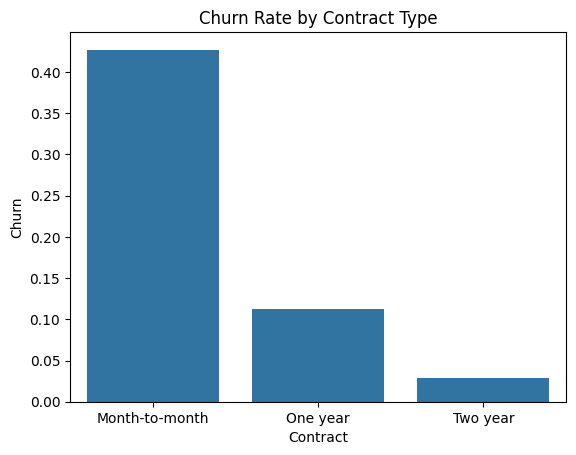

In [34]:
# Plot churn rate for each category in Contract.
sns.barplot(x='Contract', y='Churn', data=df, ci=None)
plt.title('Churn Rate by Contract Type')
plt.show()

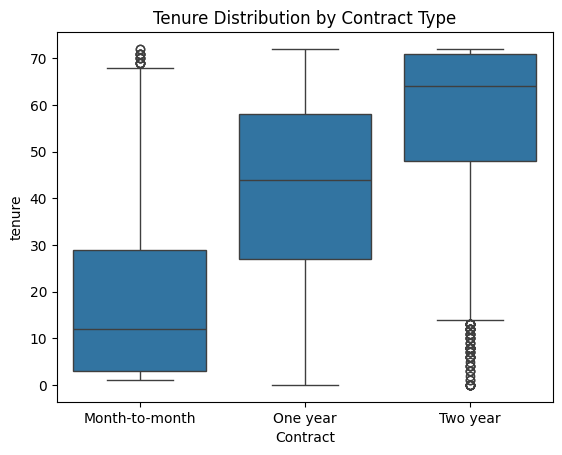

In [35]:
# Check tenure distribution for each contract type
sns.boxplot(x='Contract', y='tenure', data=df)
plt.title('Tenure Distribution by Contract Type')
plt.show()

In [36]:
# Cross-tab contract type with other variables like InternetService or PaymentMethod to see patterns in loyalty.
contract_internet = pd.crosstab(df['Contract'], df['InternetService'])
print(contract_internet)

InternetService   DSL  Fiber optic   No
Contract                               
Month-to-month   1223         2128  524
One year          570          539  364
Two year          628          429  638


## 4. Data Transformation

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Split features & target
X = df.drop(columns=['Churn'])
y = df['Churn']


In [43]:
print(X)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [45]:
# Identify columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

In [46]:
# Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [48]:
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [50]:
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

## 5. Data Modeling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
}

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    print(f"\n{name}")
    print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))
    print(classification_report(y_test, y_pred))


Logistic Regression
ROC AUC: 0.84
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.78      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.74      0.75      1405


Random Forest
ROC AUC: 0.814
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.44      0.51       372

    accuracy                           0.78      1405
   macro avg       0.71      0.67      0.68      1405
weighted avg       0.76      0.78      0.76      1405



In [53]:
# Change n_estimators in RandomForest to 500 — does ROC AUC improve?
models["Random Forest"].set_params(n_estimators=500)
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    print(f"\n{name} with updated n_estimators")
    print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))
    print(classification_report(y_test, y_pred))


Logistic Regression with updated n_estimators
ROC AUC: 0.84
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.78      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.74      0.75      1405


Random Forest with updated n_estimators
ROC AUC: 0.814
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.60      0.44      0.50       372

    accuracy                           0.77      1405
   macro avg       0.71      0.67      0.68      1405
weighted avg       0.76      0.77      0.76      1405



## 6. Evaluation

                           feature  importance
3                     TotalCharges    0.144454
1                           tenure    0.129934
2                   MonthlyCharges    0.124211
36         Contract_Month-to-month    0.071751
18               OnlineSecurity_No    0.036398
38               Contract_Two year    0.035425
27                  TechSupport_No    0.031580
16     InternetService_Fiber optic    0.029275
43  PaymentMethod_Electronic check    0.027281
0                    SeniorCitizen    0.016660


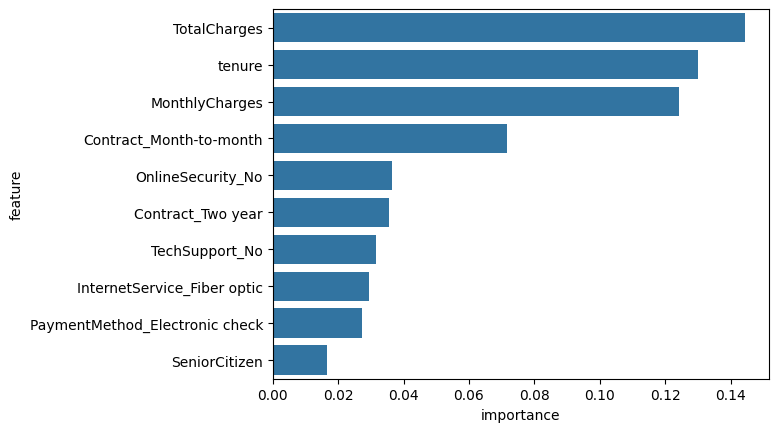

In [54]:
# Fit best model fully
best_model = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", best_model)
])
pipe.fit(X_train, y_train)

# Feature importances
import numpy as np
ohe_features = pipe.named_steps['preprocessor'].transformers_[1][1] \
    .named_steps['ohe'].get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, ohe_features])

importances = pipe.named_steps['clf'].feature_importances_
feat_imp = pd.DataFrame({"feature": all_features, "importance": importances})
feat_imp = feat_imp.sort_values("importance", ascending=False)

print(feat_imp.head(10))
sns.barplot(x="importance", y="feature", data=feat_imp.head(10))
plt.show()

## 7. Deployment

In [ ]:
import joblib
import os

joblib.dump(pipe, "churn_pipeline.joblib")
print("Model saved as churn_pipeline.joblib")

Model saved as churn_pipeline.joblib
